# Filters detected blob-crops
- edge detector filter only
- size filter not applied
- can merge input npy files of the same name pattern, but don't use it, loc_czi map will be disconnected (one crops file a time)

- instruction:
    - put under res/filter_merge/ folder

In [1]:
#%matplotlib inline
import sys
from pathlib import Path
home = str(Path.home())
sys.path.append(home+'/ccount/ccount/workflow/scripts')
sys.path.append(home+'/ccount/ccount/workflow/scripts/ccount')
import glob
import numpy as np
import matplotlib.pyplot as plt
from ccount.blob.io import load_crops
from ccount.blob.plot import show_rand_crops
import ccount.blob.misc # for remove_edge_crops
from ccount.blob.plot import flat2image

In [2]:
%pwd

'/mnt/d/ccount/dev2021/training_data/E2f4_CFUe_2OCT20/res/filter_merge'

In [3]:
%ls "../blob_crops"

E2f4_CFUe_KO_1-Stitching-01.0.crops.npy.gz*
E2f4_CFUe_KO_1-Stitching-01.1.crops.npy.gz*
E2f4_CFUe_KO_1-Stitching-01.2.crops.npy.gz*
E2f4_CFUe_KO_1-Stitching-01.3.crops.npy.gz*
E2f4_CFUe_KO_2-Stitching-02.0.crops.npy.gz*
E2f4_CFUe_KO_2-Stitching-02.1.crops.npy.gz*
E2f4_CFUe_KO_2-Stitching-02.2.crops.npy.gz*
E2f4_CFUe_KO_2-Stitching-02.3.crops.npy.gz*
E2f4_CFUe_KO_3-Stitching-03.0.crops.npy.gz*
E2f4_CFUe_KO_3-Stitching-03.1.crops.npy.gz*
E2f4_CFUe_KO_3-Stitching-03.2.crops.npy.gz*
E2f4_CFUe_KO_3-Stitching-03.3.crops.npy.gz*
E2f4_CFUe_NoEpo_1-Stitching-04.0.crops.npy.gz*
E2f4_CFUe_NoEpo_1-Stitching-04.1.crops.npy.gz*
E2f4_CFUe_NoEpo_1-Stitching-04.2.crops.npy.gz*
E2f4_CFUe_NoEpo_1-Stitching-04.3.crops.npy.gz*
E2f4_CFUe_NoEpo_2-Stitching-05.0.crops.npy.gz*
E2f4_CFUe_NoEpo_2-Stitching-05.1.crops.npy.gz*
E2f4_CFUe_NoEpo_2-Stitching-05.2.crops.npy.gz*
E2f4_CFUe_NoEpo_2-Stitching-05.3.crops.npy.gz*
E2f4_CFUe_NoEpo_3-Stitching-06.0.crops.npy.gz*
E2f4_CFUe_NoEpo_3-Stitching-06.1.crops.npy.gz*
E2

# Load Pre-build crops (cropped images of blobs)

In [4]:
name = "E2f4_CFUe_NoEpo_1-Stitching-04.0"
fname_pattern = '../blob_crops/E2f4_CFUe_NoEpo_1-Stitching-04.0.crops.npy.gz'
[x for x in glob.iglob(fname_pattern)]

['../blob_crops/E2f4_CFUe_NoEpo_1-Stitching-04.0.crops.npy.gz']

In [5]:
i = 0
for fname in glob.iglob(fname_pattern):
    i+=1
    print(i, fname)
    if (i== 1):
        crops = load_crops(fname)
    else:
        crop_ = load_crops(fname)
        crops = np.vstack((crops, crop_))
    print('merged crops:', crops.shape)

1 ../blob_crops/E2f4_CFUe_NoEpo_1-Stitching-04.0.crops.npy.gz
Reading ../blob_crops/E2f4_CFUe_NoEpo_1-Stitching-04.0.crops.npy.gz
n-crop: 4830, crop width: 80
0 Yes, 0 No, 0 Uncertain, 4830 Unlabeled
Total: 4830
merged crops: (4830, 25606)


## Remove blobs with edges in the crop

In [6]:
from importlib import reload  
reload(ccount.blob.misc)
crops_clean, crops_bad = ccount.blob.misc.remove_edge_crops(crops)
print(len(crops_clean), len(crops_bad), round(len(crops_bad)/len(crops), 2))

/home/socolovsky_lab/ccount/ccount/workflow/scripts/ccount/blob/mask_image.py:17: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(w - 1, w - 1, min(r_, w - 1))


4147 683 0.14


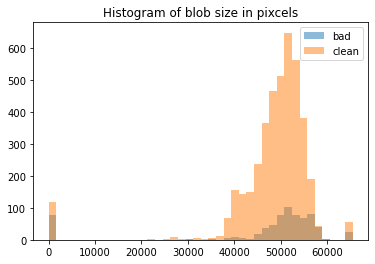

In [7]:
area_bad = crops_bad[:,6]
area_clean = crops_clean[:,6]

plt.hist(area_bad, 40, alpha = 0.5, label = 'bad')
plt.hist(area_clean, 40 , alpha = 0.5, label = 'clean')
plt.legend(loc='upper right')
plt.title("Histogram of blob size in pixcels")
plt.show()

Samples of 4 blobs will be plotted


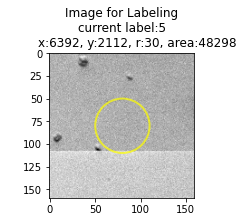

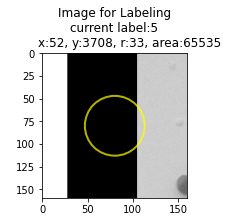

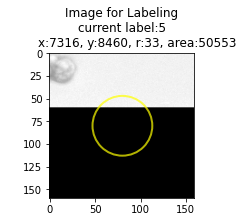

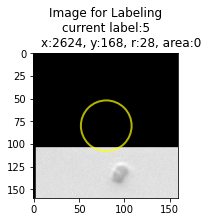

True

In [8]:
show_rand_crops(crops_bad, num_shown=4)

Samples of 10 blobs will be plotted


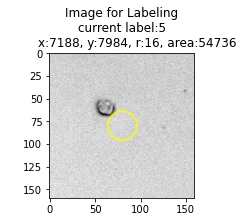

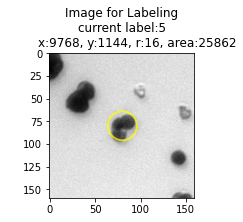

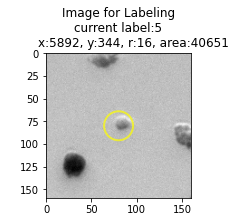

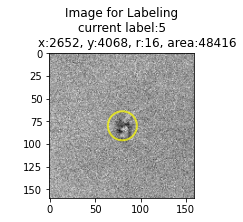

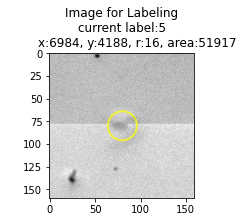

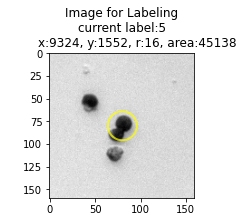

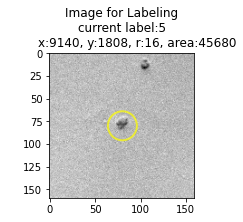

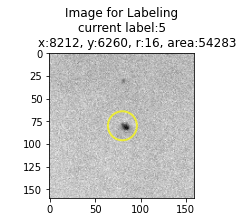

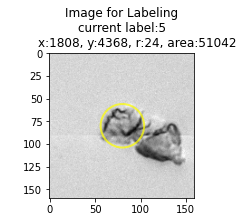

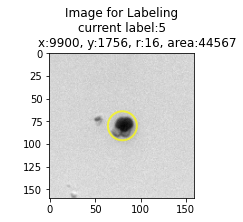

True

In [9]:
show_rand_crops(crops_clean, num_shown=10)

In [10]:
np.save(name+'.flt', crops_clean)

In [11]:
!gzip -f *npy

In [16]:
%ls -lrth

total 308M
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 704K Oct 14 13:36 edge_detector_dev.ipynb*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 150M Oct 14 14:20 E2f4_CFUe_KO_1-Stitching-01.0.flt.npy.gz*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 559K Oct 14 14:23 E2f4_CFUe_KO_1-Stitching-01.0.filter_merge.ipynb*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 834K Oct 14 14:23 E2f4_CFUe_KO_1-Stitching-01.0.filter_merge.html*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 154M Oct 14 14:30 E2f4_CFUe_NoEpo_1-Stitching-04.0.flt.npy.gz*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 582K Oct 14 14:31 filter_merge.ipynb*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 857K Oct 14 14:31 filter_merge.html*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 582K Oct 14 14:31 E2f4_CFUe_NoEpo_1-Stitching-04.0.filter_merge.ipynb*
-rwxrwxrwx 1 socolovsky_lab socolovsky_lab 857K Oct 14 14:31 E2f4_CFUe_NoEpo_1-Stitching-04.0.filter_merge.html*


In [17]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [18]:
!jupyter nbconvert --to html filter_merge.ipynb

[NbConvertApp] Converting notebook filter_merge.ipynb to html
[NbConvertApp] Writing 878805 bytes to filter_merge.html


In [19]:
nb_name = name + '.filter_merge.ipynb'
html_name = name + ".filter_merge.html"
!echo $html_name $nb_name
!cp filter_merge.ipynb $nb_name
!mv filter_merge.html $html_name

E2f4_CFUe_NoEpo_1-Stitching-04.0.filter_merge.html E2f4_CFUe_NoEpo_1-Stitching-04.0.filter_merge.ipynb
